# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [6]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [8]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split

y = ames.iloc[:, -1:]
X = ames.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [9]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [10]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [11]:
# Your code here: fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [12]:
# Your code here: generate predictions for both sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [17]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error
print(f"training error: {mean_squared_error(y_train, y_hat_train)}")
print(f"testing error: {mean_squared_error(y_test, y_hat_test)}")

training error: 1772517384.9791176
testing error: 1982741233.3656306


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [35]:
def test_model(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
    categoricals = ['BldgType', 'KitchenQual', 'Street']

    # Instantiate transformers
    log_transformer = FunctionTransformer(np.log, validate=True)
    ohe = OneHotEncoder(drop='first', sparse=False)

    # Fit transformers
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform training data
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform test data
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)
    
    # train model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    train_error = mean_squared_error(y_train, linreg.predict(X_train))
    test_error = mean_squared_error(y_test, linreg.predict(X_test))
    
    # output
    print(f"training error: {train_error}")
    print(f"testing error: {test_error}")
    return train_error, test_error

In [37]:
# Your code here
import numpy as np

train_loss = []
test_loss = []
for i in np.arange(0.5, 0.91, 0.1):
    tr_loss, te_loss = test_model(X, y, test_size=1 - i)
    train_loss.append(tr_loss)
    test_loss.append(te_loss)

training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1684560003.3222044
testing error: 2076648263.477606
training error: 1785350773.8316991
testing error: 1922144114.3142312
training error: 1719680771.748471
testing error: 2243253929.065148
training error: 1733976570.3424215
testing error: 2586726513.926922


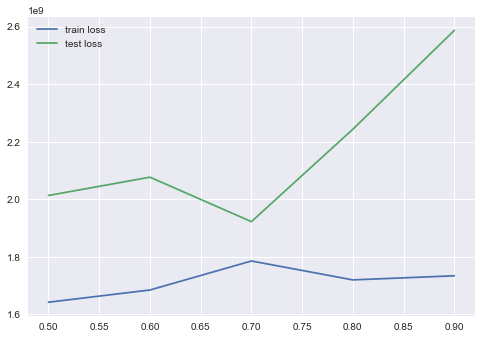

In [43]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(np.arange(0.5, 0.91, 0.1), train_loss, label="train loss")
plt.plot(np.arange(0.5, 0.91, 0.1), test_loss, label="test loss")
plt.legend();

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [44]:
# Your code here
train_loss = []
test_loss = []
for i in np.arange(0.5, 0.91, 0.1):
    tr_loss_array = np.array([])
    te_loss_array = np.array([])
    for _ in range(10):
        tr_loss, te_loss = test_model(X, y, test_size=1 - i)
        tr_loss_array = np.append(tr_loss_array, tr_loss)
        te_loss_array = np.append(te_loss_array, te_loss)
        
    train_loss.append(tr_loss_array.mean())
    test_loss.append(te_loss_array.mean())

training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1642140385.393127
testing error: 2013093403.699139
training error: 1684560003.3222044
testing error: 2076648263.477606
training error: 1684560003.3222044
testing error: 2076648263.477606
training error: 1684560003.3222044
testing error: 2076648263.477606
training error: 1684560003.3222044
testing error: 2076648263.477606
training error: 1684560003.3222044
testing error: 20766482

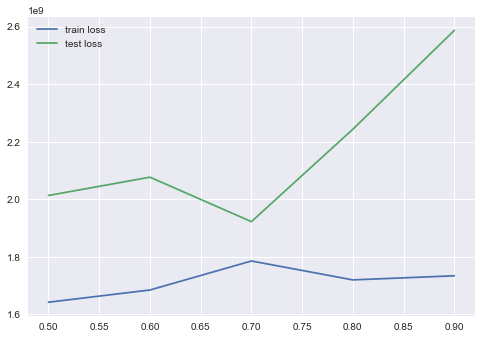

In [45]:
plt.plot(np.arange(0.5, 0.91, 0.1), train_loss, label="train loss")
plt.plot(np.arange(0.5, 0.91, 0.1), test_loss, label="test loss")
plt.legend();

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.